In [7]:
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval
import seaborn as sns


In [1]:
def data_preparation(df):
    df = df.dropna()
    
    return df
    
    

In [2]:
# Error Plot: the average max correlation each iteration that is dominantly correlated with melody

def plot_avg_iteration_max(df,title,bar_color):
    total_pieces = len(df['Audio file name'])
    number_of_iterations = sorted(set(df['Iterations']))
    iterations = ['initial iteration', 'iteration1']
    CTEs=[]
    errors=[]
    labels =[]
    
    for i in number_of_iterations:
        

        iteration = df.loc[df['Iterations']==i]
        Corrs = iteration['Correlations']
        arr=[]
        for c in Corrs:
          
            if corr <0:
                negative_values=True
            new_arr = c.strip('[')
            new_arr = new_arr.strip(']')

            if len(new_arr)>0:
                convert_float=new_arr.split(',')
                corrs_float=[float(i) for i in convert_float]

                data =[]
                for j in corrs_float:
                    data.append(float(j))  

            arr.append(max(data))
        a = np.array(arr)
        x = a[~np.isnan(a)]
        std_error = np.std(x, ddof=1) / np.sqrt(len(arr))
        average = np.mean(x)
        CTEs.append(average)
        errors.append(std_error)
        if i=="initial iteration":
            labels.append("Iteration1")
        elif i=="iteration1":
            labels.append('Iteration2')
        elif i=="iteration2":
            labels.append("Iteration3")
        elif i=="iteration3":
            labels.append("Iteration4")

        
    x_pos = np.arange(len(labels))
    fig = plt.figure(figsize = (5,5))

    ax = fig.subplots()
    plt.rcParams["font.family"] = "Times New Roman"
    ax.bar(x_pos, CTEs,
           yerr=errors,
           align='center',
           color=bar_color,
           capsize=15,width=0.4)
    
    ax.set_ylabel('Pearsons Correlation(r)',fontsize=30)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(labels,fontsize=20)
    ax.set_title(title,fontsize=20,fontweight="bold")
    ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
    plt.yticks(fontsize=18)

    plt.xticks(fontsize=18)


    # ax.set_title('Deviation of correlation after each iteration for classical music pieces')
    plt.xlabel('Iterations', fontsize=30)

    # Save the figure and show
    plt.tight_layout()
    # plt.savefig('bar_plot_with_error_bars.png')
    plt.show()


In [3]:
# Error Plot: the average least correlation each iteration 

def plot_avg_iteration_least(df,title,bar_color):
    total_pieces = len(df['Audio file name'])
    number_of_iterations = sorted(set(df['Iterations']))
    iterations = ['initial iteration', 'iteration1']
    CTEs=[]
    errors=[]
    labels =[]
    for i in number_of_iterations:
        

        iteration = df.loc[df['Iterations']==i]
        Corrs = iteration['Correlations']
        arr=[]
        negative_values=False

        for c in Corrs:
            new_arr = c.strip('[')
            new_arr = new_arr.strip(']')

            if len(new_arr)>0:
                convert_float=new_arr.split(',')
                corrs_float=[float(i) for i in convert_float]

                data =[]
                for j in corrs_float:
                    data.append(float(j))  

            arr.append(min(data))
        a = np.array(arr)
        x = a[~np.isnan(a)]
        std_error = np.std(x, ddof=1) / np.sqrt(len(arr))
        average = np.mean(x)
        CTEs.append(average)
        errors.append(std_error)
        if i=="initial iteration":
            labels.append("Iteration1")
        elif i=="iteration1":
            labels.append('Iteration2')
        elif i=="iteration2":
            labels.append("Iteration3")
        elif i=="iteration3":
            labels.append("Iteration4")

        
    x_pos = np.arange(len(labels))
    fig = plt.figure(figsize = (5,5))

    ax = fig.subplots()
    plt.rcParams["font.family"] = "Times New Roman"
    ax.bar(x_pos, CTEs,
           yerr=errors,
           align='center',
           color=bar_color,
           capsize=15,width=0.4)
    
    ax.set_ylabel('Pearsons Correlation(r)',fontsize=30)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(labels,fontsize=20)
    ax.set_title(title,fontsize=20,fontweight="bold")
    

    plt.yticks([-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1],fontsize=20,fontweight="bold")
    plt.axhline(color='black')
    
                
#     plt.yticks([0,0.2,0.4,0.6,0.8,1],fontsize=20,fontweight="bold")


#     ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
    plt.yticks(fontsize=18)

    plt.xticks(fontsize=18)


    # ax.set_title('Deviation of correlation after each iteration for classical music pieces')
    plt.xlabel('Iterations', fontsize=30)

    # Save the figure and show
    plt.tight_layout()
    # plt.savefig('bar_plot_with_error_bars.png')
    plt.show()


In [14]:
# PLots the sample piece wi

def plot_sample_piece(df,color_dict):
    
    number_of_iterations = df['Iterations']
    max_tracks = []
    
    for i in number_of_iterations:
        title=""
        print(i)
        iteration = df.loc[df['Iterations']==i]
        if i=="initial iteration":
            title="Iteration1"
        elif i=="iteration1":
            title='Iteration2'
        elif i=="iteration2":
            title="Iteration3"
        elif i=="iteration3":
            title="Iteration4"
        Corrs = iteration['Correlations'].apply(literal_eval)
        tracks = iteration['Tracks'].apply(literal_eval)
        dictionary={}
        for track,Corr in zip(tracks,Corrs):
            for t,c in zip(track,Corr):
                dictionary[t]=c
        
#         colors = assign_color(list(dictionary.keys()),colors)
#         print(dictionary)
                
        max_track = iteration['Tracks removed'].apply(literal_eval)
        for j in max_track:
            max_tracks.append(j[0])
        
        try:
            if i =="initial iteration":
                sorted_dict = dict(sorted(dictionary.items(), key=lambda item: item[1],reverse = True))

            elif i == "iteration1" or i == "iteration2" or i=="iteration3":
                sorted_dict = dict(sorted(dictionary.items(), key=lambda item: item[1],reverse = True))
                for track in max_tracks:
                    if track not in sorted_dict:
                        sorted_dict[track] = 0
                print(sorted_dict)


            sorted_tracks = list(sorted_dict.keys())
            sorted_corr = list(sorted_dict.values())
            negative_values = False

            for corr in sorted_corr:
                if corr <0:
                    negative_values=True


            fig = plt.figure(figsize = (5,5))

            ax = fig.subplots()
            
            for d,j in zip(sorted_tracks,sorted_corr):
                c = color_dict[d]                   
                ax.bar(d, j,
                       align='center',
                       width=0.5,color=c)
            ax.set_ylabel('Pearsons Correlation (r)',fontsize=30)
            ax.set_yticks([0,0.2,0.4,0.6,0.8,1])

            ax.set_title(title,fontsize=20,fontweight="bold")
            plt.xlabel('Instrument tracks', fontsize=30)
            plt.xticks(fontsize=13)
#             plt.xticks(rotation=30)
            plt.rcParams["font.family"] = "Times New Roman"

            if negative_values == True:
                plt.yticks([-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1],fontsize=20,fontweight="bold")
                plt.axhline(color='black')
            else:
                
                plt.yticks([0,0.2,0.4,0.6,0.8,1],fontsize=20,fontweight="bold")


        
            plt.xticks(fontsize=13)
#             plt.xticks(rotation=30)
            plt.rcParams["font.family"] = "Times New Roman"
            plt.tight_layout()
            plt.rcParams["font.family"] = "Times New Roman"
            # plt.savefig('bar_plot_with_error_bars.png')
            # ax.set_facecolor('darkgray')
            # fig.patch.set_facecolor('darkgray')
            plt.show()
        except:
            pass





initial iteration


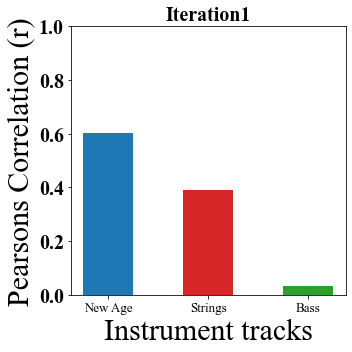

iteration1
{'Strings': 0.7324866044850169, 'New Age': 0.5509029569359, 'Drums': 0.0, 'Bass': 0}


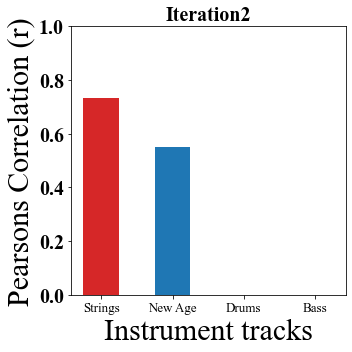

iteration2
{'New Age': 0.9724325603407478, 'Drums': 0.0, 'Bass': 0, 'Strings': 0}


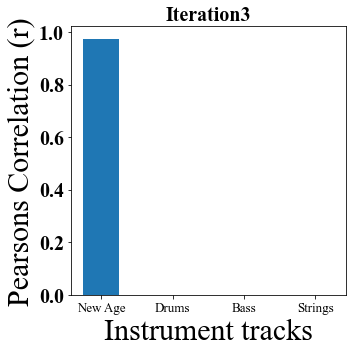

iteration3
{'Drums': 1, 'Bass': 0, 'Strings': 0, 'New Age': 0, None: 0}


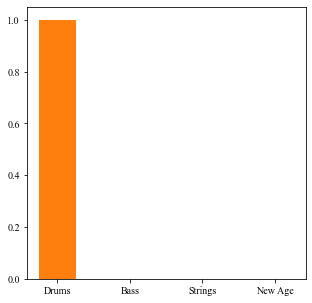

In [15]:
def main():
    df = pd.read_csv('/Users/nissimolaji/Desktop/5thyear/Dissertation/Evaluation/Evaluation_output/not max track/DeepSalience/Pop/popDSCORRL30.csv')
    df=data_preparation(df)
#     print(df.dropna())
    sample_piece = df.loc[df['Audio file name']=='pop_audio49']
    sample_piece=sample_piece.mask(df.eq('None')).dropna()
#     print(sample_piece)

    colors = {'New Age':'tab:blue','Strings':'tab:red','Drums':'tab:orange','Bass':'tab:green'}
    plot_sample_piece(sample_piece,colors)
#     plot_avg_iteration_max(df,"Algorithm 2","salmon")

#     plot_avg_iteration_least(df,"Algorithm 2","salmon")
#     plot_sample_piece(sample_piece)
    
main()  

initial iteration


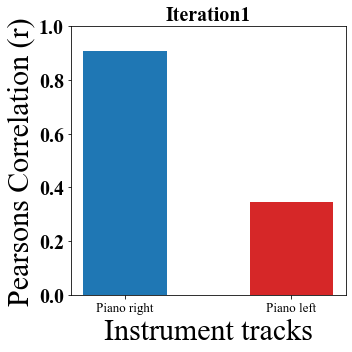

iteration1
{'Piano right': 0.9793482153515578, 'Piano left': 0}


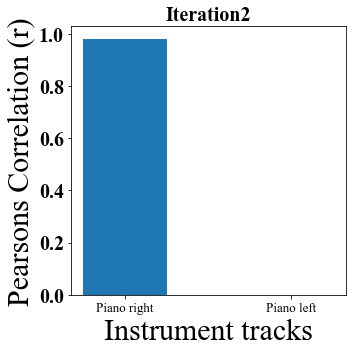

In [16]:
def main():
    df = pd.read_csv('/Users/nissimolaji/Desktop/5thyear/Dissertation/Evaluation/Evaluation_output/not max track/DeepSalience/Classical/classicalDSCORRL30.csv')
    df=data_preparation(df)

    sample_piece = df.loc[df['Audio file name']=='muss_1']
    sample_piece=sample_piece.mask(df.eq('None')).dropna()
#     print(sample_piece)

    colors = {'Piano right':'tab:blue','Piano left':'tab:red'}
    plot_sample_piece(sample_piece,colors)
#     plot_avg_iteration_least(df,"Algorithm 2","salmon")
    
main()

initial iteration


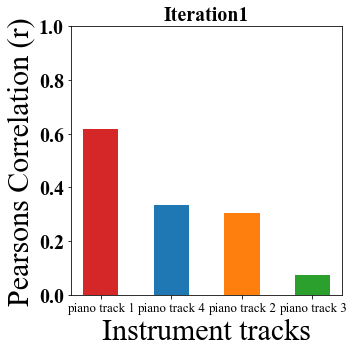

iteration1
{'piano track 2': 0.7903885480572597, 'piano track 1': 0.7597137014314929, 'piano track 4': 0.4652351738241309, 'piano track 3': 0}


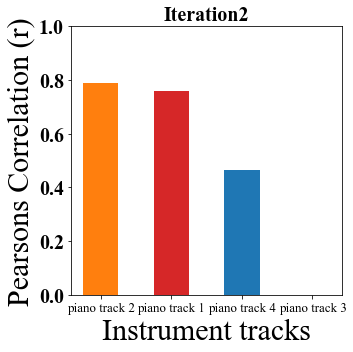

iteration2
{'piano track 1': 0.7677631578947368, 'piano track 4': 0.4868421052631579, 'piano track 3': 0, 'piano track 2': 0}


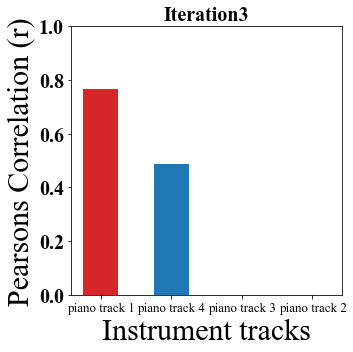

iteration3
{'piano track 1': 1.0, 'piano track 3': 0, 'piano track 2': 0, 'piano track 4': 0}


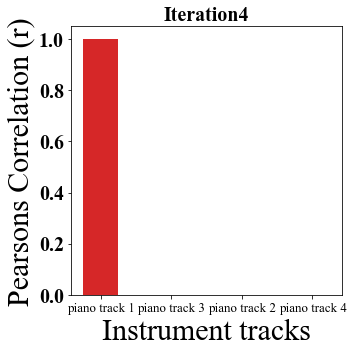

In [12]:
def main():
    df = pd.read_csv('/Users/nissimolaji/Desktop/5thyear/Dissertation/Evaluation/Evaluation_output/not max track/DeepSalience/Bach/bachDSCORRL30.csv')
    df=data_preparation(df)
#     print(df)
    sample_piece = df.loc[df['Audio file name']=='03achgot']
    sample_piece=sample_piece.mask(df.eq('None')).dropna()
#     print(sample_piece['Tracks'])
    colors = {'piano track 4':'tab:blue','piano track 1':'tab:red','piano track 2':'tab:orange','piano track 3':'tab:green'}
    plot_sample_piece_color(sample_piece,colors)
#     plot_avg_iteration_least(df,"Algorithm 2","salmon")
    
main()

initial iteration


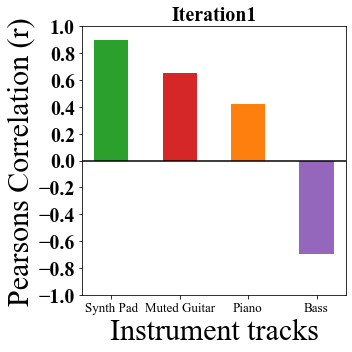

iteration1
{'Synth Pad': 0.6759098786828422, 'Piano': 0.492894280762565, 'Muted Guitar': 0.4800693240901213, 'Bass': 0}


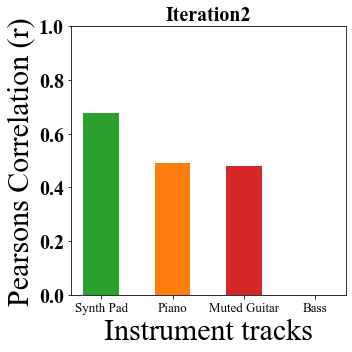

iteration2
{'Synth Pad': 0.7450511945392492, 'Muted Guitar': 0.5098976109215017, 'Bass': 0, 'Piano': 0}


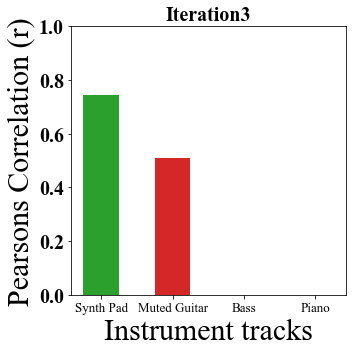

iteration3
{'Synth Pad': 0.8854251012145749, 'Bass': 0, 'Piano': 0, 'Muted Guitar': 0}


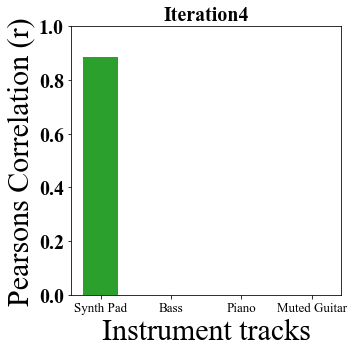

In [17]:
def main():
    df = pd.read_csv('/Users/nissimolaji/Desktop/5thyear/Dissertation/Evaluation/Evaluation_output/not max track/DeepSalience/Jazz/jazzDSCORRL302.csv')
    df=data_preparation(df)
#     print(df)
    sample_piece = df.loc[df['Audio file name']=='jazz_audio17']
    sample_piece=sample_piece.mask(df.eq('None')).dropna()
#     print(sample_piece['Tracks'])
    colors = {'Drums':'tab:blue','Piano':'tab:orange','Synth Pad':'tab:green','Muted Guitar':'tab:red','Bass':'tab:purple'}
    plot_sample_piece(sample_piece,colors)
#     plot_avg_iteration_least(df,"Algorithm 2","salmon")
    

main()  